In [10]:
import math
import pandas as pd
from IPython.display import display
# Function to calculate Cosine Similarity
def calculate_cosine_similarity(pointA, pointB):
    # Step 1: Calculate dot product of pointA and pointB
    dot_product = sum(a * b for a, b in zip(pointA, pointB))
    
    # Step 2: Calculate magnitude of pointA
    magnitudeA = math.sqrt(sum(a * a for a in pointA))
    
    # Step 3: Calculate magnitude of pointB
    magnitudeB = math.sqrt(sum(b * b for b in pointB))
    
    # Step 4: Return cosine similarity (dot product / (magnitudeA * magnitudeB))
    return dot_product / (magnitudeA * magnitudeB)

# Function to calculate Euclidean Distance
def calculate_euclidean_distance(pointA, pointB):
    # Step 1: Calculate the sum of squared differences
    sum_of_squares = sum((a - b) ** 2 for a, b in zip(pointA, pointB))
    
    # Step 2: Return the square root of the sum of squares
    return math.sqrt(sum_of_squares)

# Example whiskey data in 2 dimensions (e.g., two chemical components per whiskey)




In [11]:
whiskeys = {
    "Main Whiskey": [8, 13], #chem A, chem B in PPM
    "Whiskey A": [5, 10],
    "Whiskey B": [8, 12],
    "Whiskey C": [12, 7],
    "Whiskey D": [3, 4],
    "Whiskey E": [10, 15],
    "Whiskey F": [6, 5],
    "Whiskey G": [9, 11],
    "Whiskey H": [4, 6],
    "Whiskey I": [11, 8],
    "Whiskey J": [12, 10],
    "Whiskey K": [2, 3],
    "Whiskey L": [13, 14],
    "Whiskey M": [1, 2]
}

In [12]:
def compare_whiskeys(whiskeys):
    data = {
        "Whiskey": [],
        "Cosine Similarity": [],
        "Euclidean Distance": []
    }

    whiskey_names = list(whiskeys.keys())[1:]
    for i in range(len(whiskey_names)):  # Start from 1 to skip "Main Whiskey"
        name = whiskey_names[i]
        whiskeyComp = whiskeys[name]

        # Calculate Cosine Similarity
        cosine_similarity = calculate_cosine_similarity(whiskeys["Main Whiskey"], whiskeyComp)

        # Calculate Euclidean Distance
        euclidean_distance = calculate_euclidean_distance(whiskeys["Main Whiskey"], whiskeyComp)

        # Append results to the data dictionary
        data["Whiskey"].append(name)
        data["Cosine Similarity"].append((cosine_similarity)*(cosine_similarity))
        data["Euclidean Distance"].append((1/euclidean_distance)**(1/8))


    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data)

    # Add ranks: largest cosine is best, smallest euclidean is best
    df["Cosine Rank"] = df["Cosine Similarity"].rank(ascending=False)
    df["Euclidean Rank"] = df["Euclidean Distance"].rank(ascending=False)

    df["Difference"] = abs(df["Cosine Rank"] - df["Euclidean Rank"])
    return df

# Run the comparison and output the DataFrame
results_df = compare_whiskeys(whiskeys)

display(results_df.sort_values(by="Cosine Similarity", ascending=False))
display(results_df.sort_values(by="Euclidean Distance", ascending=False))

,Whiskey,Cosine Similarity,Euclidean Distance,Cosine Rank,Euclidean Rank,Difference
1,Whiskey B,0.998679,1.000000,2.5,1.0,1.5
4,Whiskey E,0.998679,0.878126,2.5,3.0,0.5
7,Whiskey H,0.998679,0.770359,2.5,9.0,6.5
10,Whiskey K,0.998679,0.735620,2.5,12.0,9.5
0,Whiskey A,0.992275,0.834729,5.5,4.0,1.5
12,Whiskey M,0.992275,0.725432,5.5,13.0,7.5
3,Whiskey D,0.991588,0.747168,7.0,11.0,4.0
6,Whiskey G,0.982131,0.904304,8.0,2.0,6.0
11,Whiskey L,0.961797,0.815763,9.0,6.0,3.0
9,Whiskey J,0.898403,0.817765,10.5,5.0,5.5


,Whiskey,Cosine Similarity,Euclidean Distance,Cosine Rank,Euclidean Rank,Difference
1,Whiskey B,0.998679,1.000000,2.5,1.0,1.5
6,Whiskey G,0.982131,0.904304,8.0,2.0,6.0
4,Whiskey E,0.998679,0.878126,2.5,3.0,0.5
0,Whiskey A,0.992275,0.834729,5.5,4.0,1.5
9,Whiskey J,0.898403,0.817765,10.5,5.0,5.5
11,Whiskey L,0.961797,0.815763,9.0,6.0,3.0
8,Whiskey I,0.855214,0.802200,12.0,7.0,5.0
2,Whiskey C,0.777625,0.781178,13.0,8.0,5.0
7,Whiskey H,0.998679,0.770359,2.5,9.0,6.5
5,Whiskey F,0.898403,0.768189,10.5,10.0,0.5


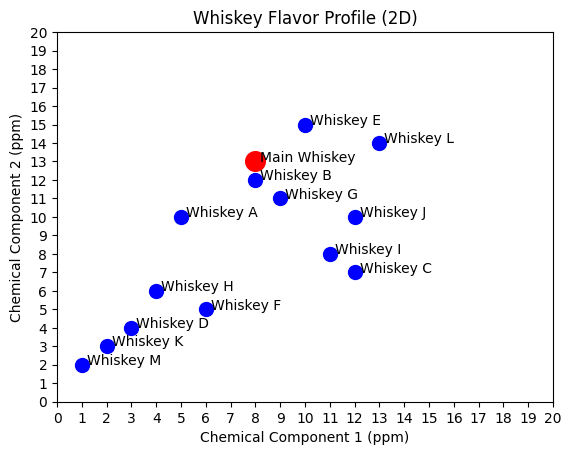

In [13]:
import matplotlib.pyplot as plt

# Function to plot whiskeys on a 2D chart
def plot_whiskeys(whiskeys, main_whiskey_name):
    fig, ax = plt.subplots()

    # Plot all whiskeys
    for name, coords in whiskeys.items():
        ax.scatter(coords[0], coords[1], label=name, s=100, color = 'blue')  # s=100 makes the markers bigger
        ax.text(coords[0] + 0.2, coords[1], name)  # Add labels next to the points
    
    # Highlight the main whiskey with a different color and larger size
    main_coords = whiskeys[main_whiskey_name]
    ax.scatter(main_coords[0], main_coords[1], color='red',s=200,  label=f"Main: {main_whiskey_name}")
    
    # Add title and labels
    ax.set_title("Whiskey Flavor Profile (2D)")
    ax.set_xlabel("Chemical Component 1 (ppm)")
    ax.set_ylabel("Chemical Component 2 (ppm)")

    ax.set_xlim(0,20)
    ax.set_ylim(0,20)

    ax.set_xticks(range(0, 21, 1)) # Set the x-ticks to be 1 apart
    ax.set_yticks(range(0, 21, 1)) # Set the y-ticks to be 1 apart

    # Display the legend
    # plt.legend()

    # Show the plot
    plt.show()

# Example: Plot the whiskeys and highlight "Whiskey A"
plot_whiskeys(whiskeys, "Main Whiskey")


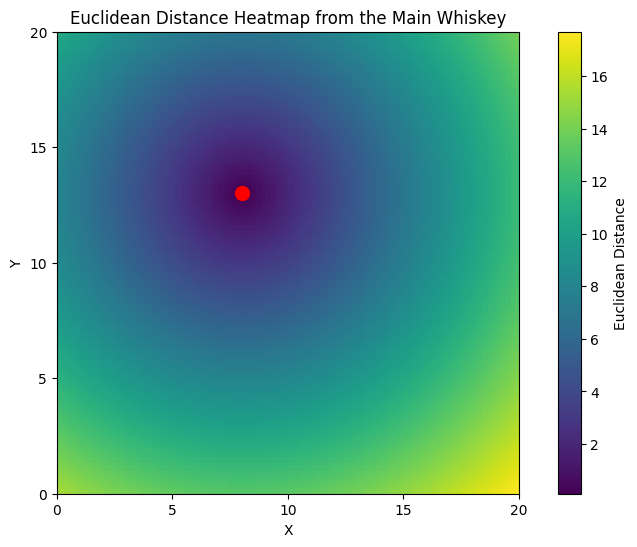

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
grid_size = 100  # 100x100 grid

# Create a grid of (x, y) coordinates
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)

# Central point (0, 0) - you can change this to any point if desired
center_x, center_y = whiskeys["Main Whiskey"][0], whiskeys["Main Whiskey"][1]

# Calculate the Euclidean distance from the center for each point in the grid
distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(distance, extent=[0, 20, 0, 20], origin='lower')
plt.colorbar(label='Euclidean Distance')
plt.title("Euclidean Distance Heatmap from the Main Whiskey")
plt.scatter(whiskeys["Main Whiskey"][0], whiskeys["Main Whiskey"][1], color='red', s=100, label="Main Whiskey")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(range(0, 21, 5))
plt.yticks(range(0, 21, 5))
plt.show()



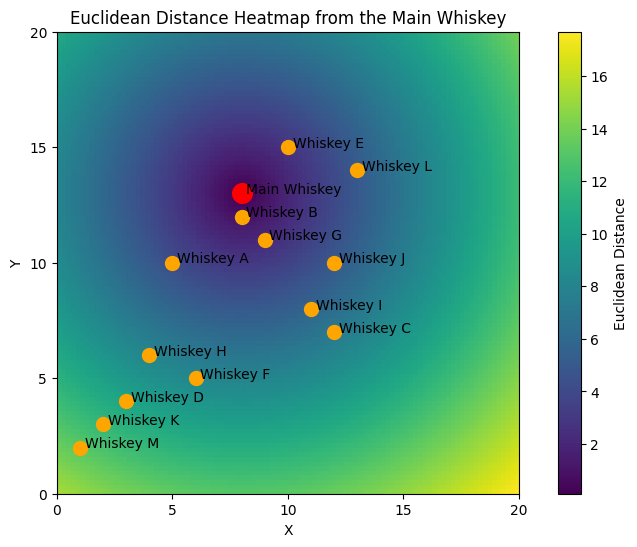

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
grid_size = 100  # 100x100 grid

# Create a grid of (x, y) coordinates
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)

# Central point (0, 0) - you can change this to any point if desired
center_x, center_y = whiskeys["Main Whiskey"][0], whiskeys["Main Whiskey"][1]

# Calculate the Euclidean distance from the center for each point in the grid
distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(distance, extent=[0, 20, 0, 20], origin='lower')
plt.colorbar(label='Euclidean Distance')
plt.title("Euclidean Distance Heatmap from the Main Whiskey")
plt.scatter(whiskeys["Main Whiskey"][0], whiskeys["Main Whiskey"][1], color='red', s=100, label="Main Whiskey")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(range(0, 21, 5))
plt.yticks(range(0, 21, 5))
for name, coords in whiskeys.items():
    plt.scatter(coords[0], coords[1], label=name, s=100, color = 'orange')  # s=100 makes the markers bigger
    plt.text(coords[0] + 0.2, coords[1], name)  # Add labels next to the points

# Highlight the main whiskey with a different color and larger size
main_coords = whiskeys["Main Whiskey"]
plt.scatter(main_coords[0], main_coords[1], color='red',s=200,  label=f"Main: Main Whiskey")
plt.show()

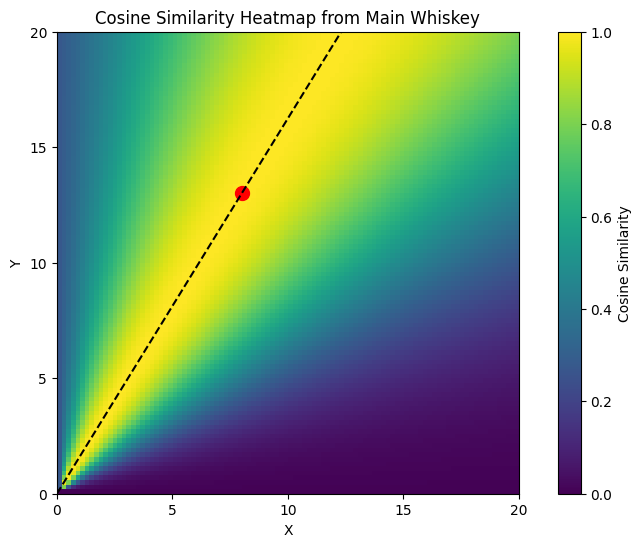

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
grid_size = 100  # 100x100 grid

# Create a grid of (x, y) coordinates from 0 to 20
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)

# Define the reference vector [8, 7]
ref_vector = np.array(whiskeys["Main Whiskey"])

# Calculate cosine similarity for each point in the grid
# First, calculate the magnitudes of the reference vector and the grid vectors
grid_magnitude = np.sqrt(X**2 + Y**2)
ref_magnitude = np.linalg.norm(ref_vector)

# Avoid division by zero for the grid magnitude
grid_magnitude[grid_magnitude == 0] = 1

# Calculate the dot product between the reference vector and each grid vector (X, Y)
dot_product = X * ref_vector[0] + Y * ref_vector[1]

# Calculate cosine similarity
cosine_similarity = dot_product / (grid_magnitude * ref_magnitude)

cosine_similarity = cosine_similarity ** 8

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(cosine_similarity, extent=[0, 20, 0, 20], origin='lower')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Heatmap from Main Whiskey")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.plot([0,whiskeys["Main Whiskey"][0]*20], [0,whiskeys["Main Whiskey"][1]*20], color='black', linestyle='--')
plt.scatter(whiskeys["Main Whiskey"][0], whiskeys["Main Whiskey"][1], color='red', s=100, label="Main Whiskey")
plt.xticks(range(0, 21, 5))
plt.yticks(range(0, 21, 5))
plt.show()


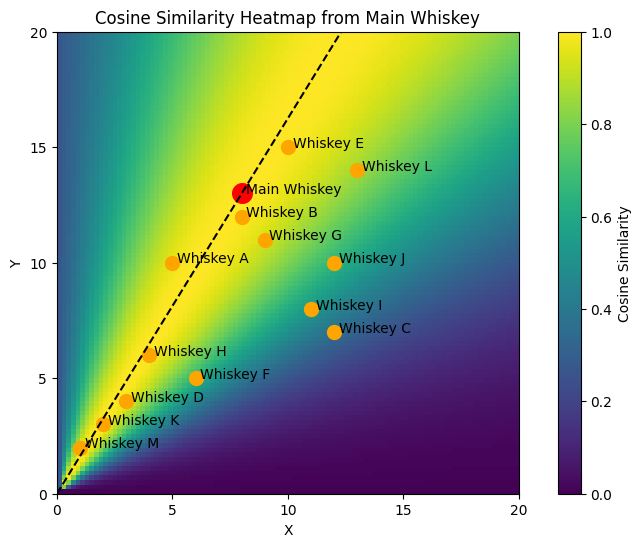

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
grid_size = 100  # 100x100 grid

# Create a grid of (x, y) coordinates from 0 to 20
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)

# Define the reference vector [8, 7]
ref_vector = np.array(whiskeys["Main Whiskey"])

# Calculate cosine similarity for each point in the grid
# First, calculate the magnitudes of the reference vector and the grid vectors
grid_magnitude = np.sqrt(X**2 + Y**2)

ref_magnitude = np.linalg.norm(ref_vector)

# Avoid division by zero for the grid magnitude
grid_magnitude[grid_magnitude == 0] = 1

# Calculate the dot product between the reference vector and each grid vector (X, Y)
dot_product = X * ref_vector[0] + Y * ref_vector[1]

# Calculate cosine similarity
cosine_similarity = dot_product / (grid_magnitude * ref_magnitude)

cosine_similarity = cosine_similarity ** 8



# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(cosine_similarity, extent=[0, 20, 0, 20], origin='lower')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Heatmap from Main Whiskey")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.plot([0,whiskeys["Main Whiskey"][0]*20], [0,whiskeys["Main Whiskey"][1]*20], color='black', linestyle='--')
plt.scatter(whiskeys["Main Whiskey"][0], whiskeys["Main Whiskey"][1], color='red', s=100, label="Main Whiskey")
plt.xticks(range(0, 21, 5))
plt.yticks(range(0, 21, 5))

for name, coords in whiskeys.items():
    plt.scatter(coords[0], coords[1], label=name, s=100, color = 'orange')  # s=100 makes the markers bigger
    plt.text(coords[0] + 0.2, coords[1], name)  # Add labels next to the points

# Highlight the main whiskey with a different color and larger size
main_coords = whiskeys["Main Whiskey"]
plt.scatter(main_coords[0], main_coords[1], color='red',s=200,  label=f"Main: Main Whiskey")
plt.show()

In [18]:
500ml

Drink A: 100ml Chem A, 100ml Chem B, 300ml Water    (20%,20%,60%) 

Drink B: 200ml Chem A, 200ml Chem B, 100ml Water    (40%,40%,20%) Stronger



SyntaxError: invalid decimal literal (3228208479.py, line 1)